# Sleep Disorder Analysis and Gradient Boosting Model Training

Data collected multiple features on the outputs of "Normal", "Insomnia", and "Sleep Apnea"

In [32]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Current Directory
!echo %cd%

C:\Users\raopr\MachineLearning_SleepAnalysis


In [3]:
#Create the dataframe by reading csv file from kaggle
df = pd.read_csv('../Downloads/Sleep_data/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
#print shape of the df
row, col = df.shape
print("Rows:",row)
print("Columns:",col)
#Output head of the df
df.head()

Rows: 374
Columns: 13


Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [5]:
#Provide information about the df
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [6]:
#Check to see if df has any null values and what the data types of each features are
df.info()
# Note: Have to perform Label Encoding for all non-categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
#Shape of output
df["Sleep Disorder"].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [8]:
df.count()
# No null values in any of the features

Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             374
dtype: int64

In [9]:
# Split features into categorical and numerical
# Encode them into catergorical data(label and integer encoding)
# Decide if One-Hot encoding is necessary

In [10]:
#Splits data into categorical and numerical values
categorical_col = [i for i in df.columns if df.dtypes[i]=='object']
numerical_col = [i for i in df.columns if i not in categorical_col]
categorical_col

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

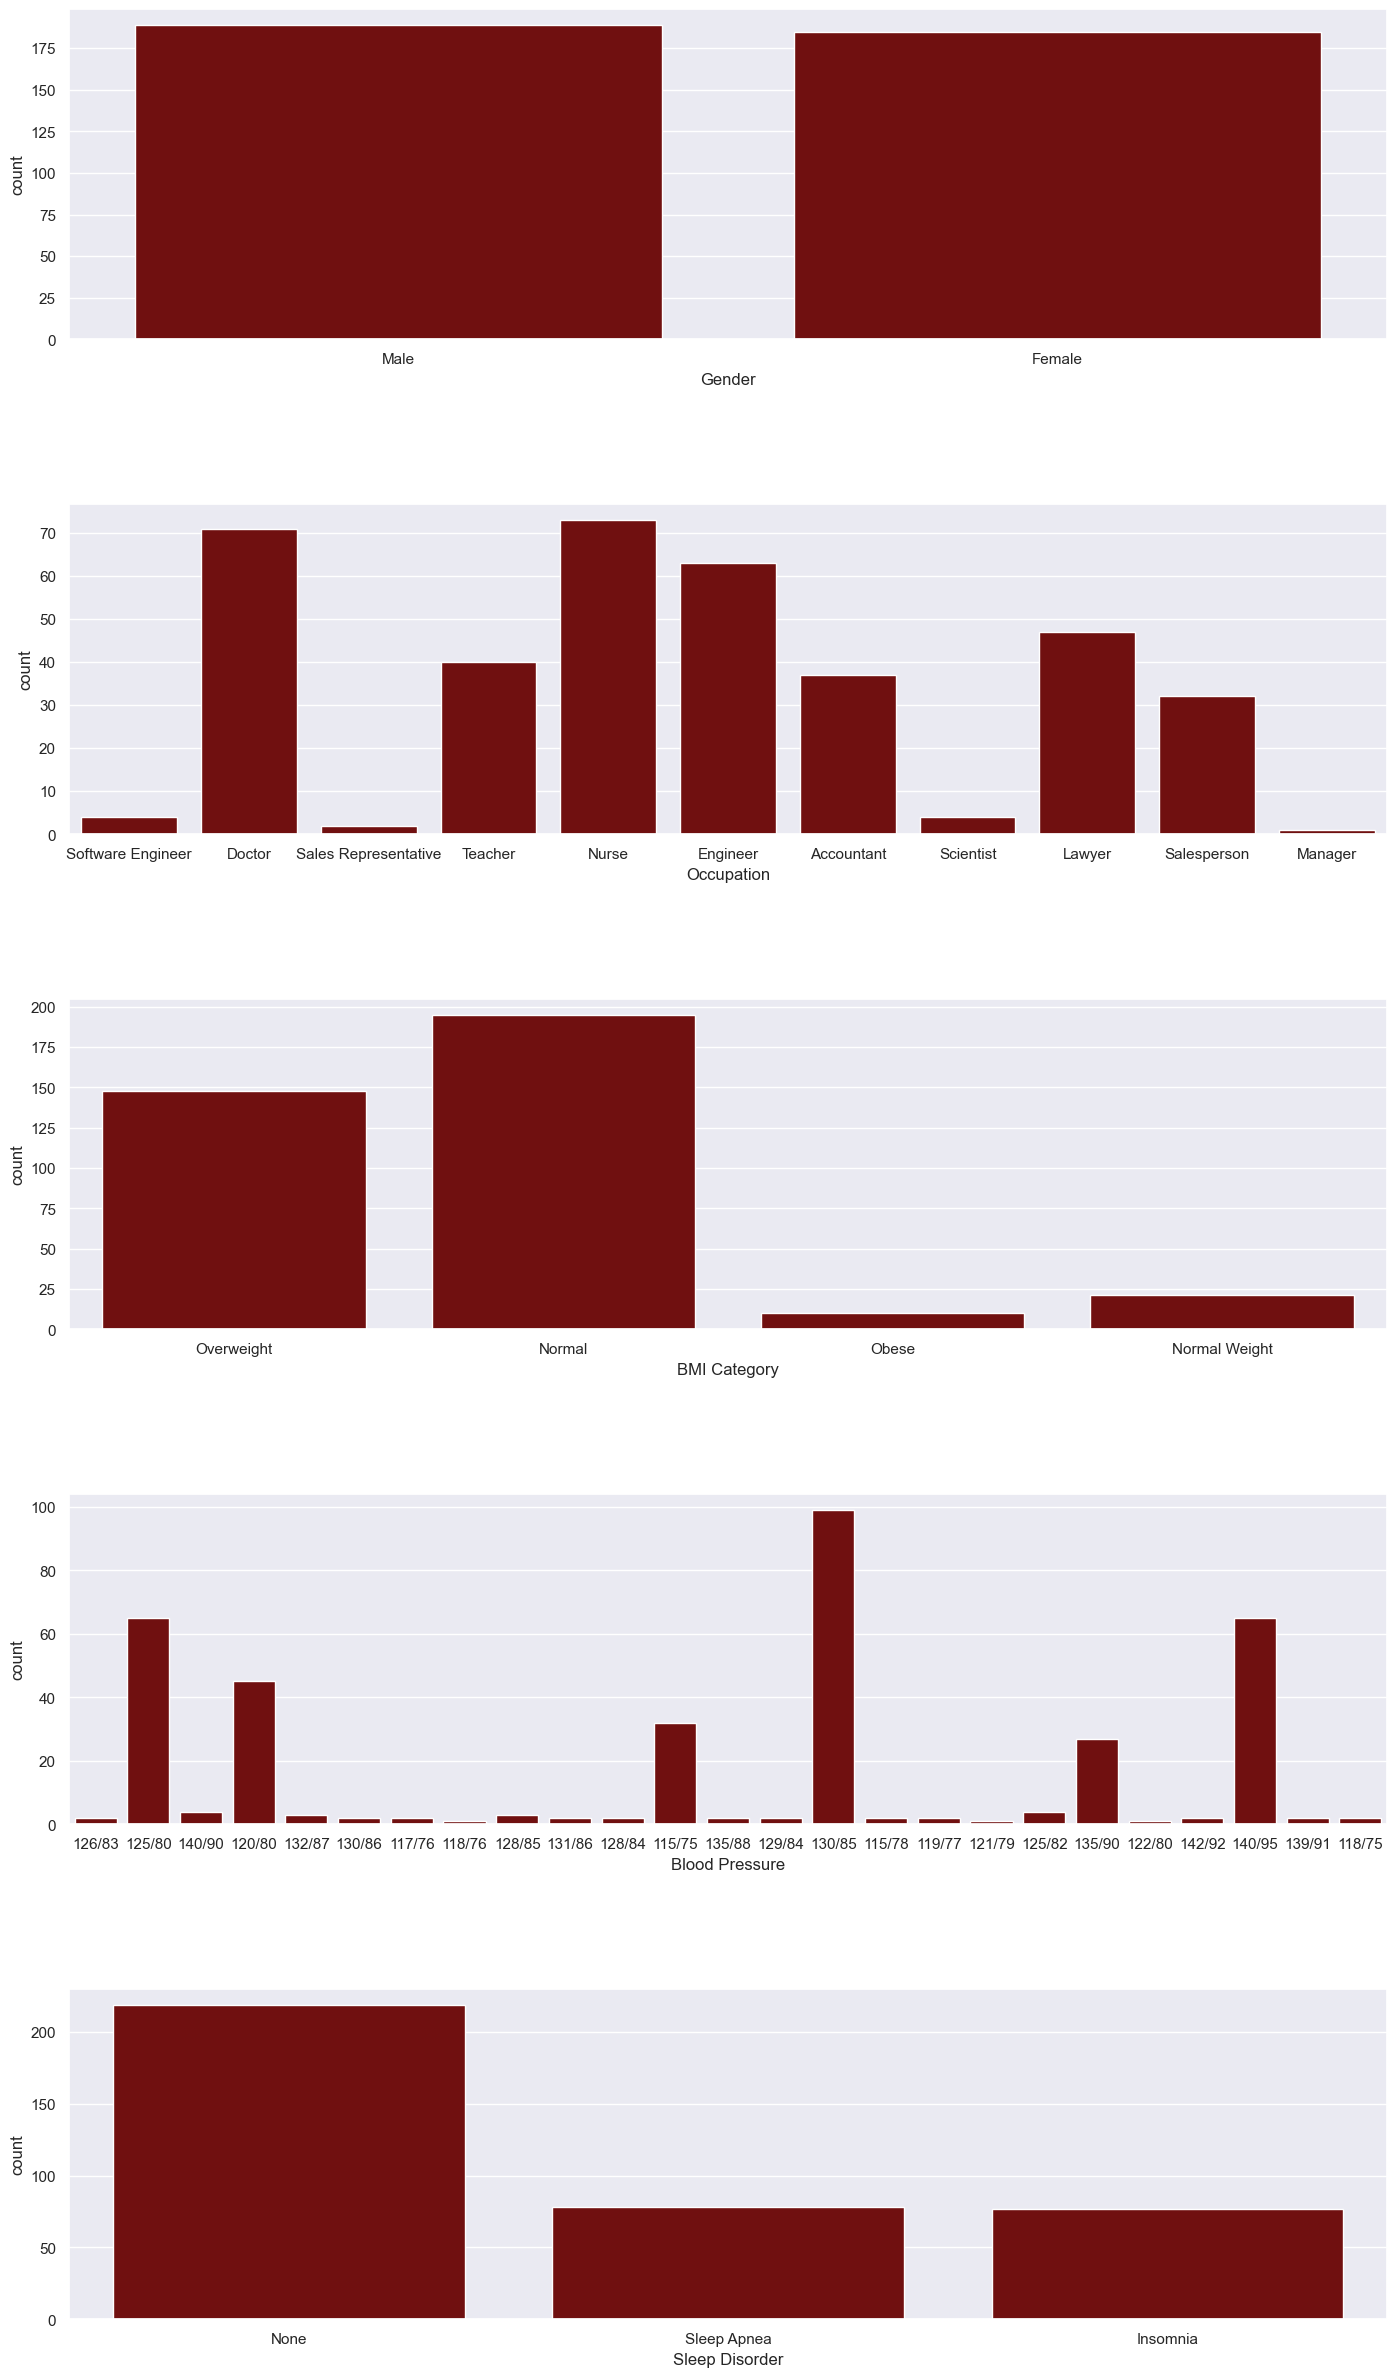

In [11]:
sns.set()
fig, axes = plt.subplots(5,1, figsize=(17,30))
sns.countplot(data=df, x='Gender', ax=axes[0],color = "maroon")
sns.countplot(data=df, x='Occupation',  ax=axes[1],color = "maroon")
sns.countplot(data=df, x='BMI Category', ax=axes[2],color = "maroon")
sns.countplot(data=df, x='Blood Pressure', ax=axes[3],color = "maroon")
sns.countplot(data=df, x='Sleep Disorder', ax=axes[4], color = "maroon")
plt.subplots_adjust(wspace = 0.5)
fig.subplots_adjust(wspace=0.2, hspace=0.5)

In [12]:
df_numerical = df[numerical_col]
df_numerical.head()

Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  
0             6          77         4200  
1             8          75        10000  
2             8          75        10000  
3             8          85         3000  
4             8          85         3000

In [13]:
df_corr = df.corr(numeric_only = True)
corr_heatmap = sns.heatmap(df_corr, cmap = "magma")
plt.show()

In [14]:
#Drop Person ID column
df=df.drop(["Person ID"], axis = 1)

In [15]:
#Label encode categorical data
label_encoder = LabelEncoder()
encoding_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
for col in encoding_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             3              11   
1                       60             8             0               9   
2                       60             8             0               9   
3                       30             8             2              22   
4                       30             8             2              22   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77         4200               1  
1          75        10000               1  
2          75        10000               1  
3          85         3000               2  
4          85         3000               2

In [16]:
#Split the df into input features and output features
X = df[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']]
y = df['Sleep Disorder']
#Check if df is split into X and y
X.head(n=5)

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             3              11   
1                       60             8             0               9   
2                       60             8             0               9   
3                       30             8             2              22   
4                       30             8             2              22   

   Heart Rate  Daily Steps  
0          77         4200  
1          75        10000  
2          75        10000  
3          85         3000  
4          85         3000

In [17]:
#Check if output is split from the input
y.head()

0    1
1    1
2    1
3    2
4    2
Name: Sleep Disorder, dtype: int32

In [18]:
# Dimensianlity Reduction(PCA)
# Feature Importance
# Hyper-Opt(Grid search alternative)

In [19]:
#Find which values to One-Hot Encode
for col in X[categorical_col[:-1]]:
    print(f'We have {len(df[col].unique())} unique values in {col}')

We have 2 unique values in Gender
We have 11 unique values in Occupation
We have 4 unique values in BMI Category
We have 25 unique values in Blood Pressure


In [20]:
#One Hot Encode the non-binary categorical features
df_X = pd.get_dummies(X, columns = ['Occupation', 'BMI Category', 'Blood Pressure'])
df_X.head()

Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0       1   27             6.1                 6                       42   
1       1   28             6.2                 6                       60   
2       1   28             6.2                 6                       60   
3       1   28             5.9                 4                       30   
4       1   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  Occupation_0  Occupation_1  ...  \
0             6          77         4200             0             0  ...   
1             8          75        10000             0             1  ...   
2             8          75        10000             0             1  ...   
3             8          85         3000             0             0  ...   
4             8          85         3000             0             0  ...   

   Blood Pressure_15  Blood Pressure_16  Blood Pressure_17  Blood Pressure_18  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Blood Pressure_19  Blood Pressure_20  Blood Pressure_21  Blood Pressure_22  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   Blood Pressure_23  Blood Pressure_24  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  

[5 rows x 48 columns]

In [21]:
#Normalize all the numerical features
normalizer = Normalizer()
df_X[numerical_col[1:]] = normalizer.fit_transform(df_X[numerical_col[1:]])
df_X.head(n=5)

Gender       Age  Sleep Duration  Quality of Sleep  \
0       1  0.006427        0.001452          0.001428   
1       1  0.002800        0.000620          0.000600   
2       1  0.002800        0.000620          0.000600   
3       1  0.009329        0.001966          0.001333   
4       1  0.009329        0.001966          0.001333   

   Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
0                 0.009998      0.001428    0.018329     0.999758   
1                 0.006000      0.000800    0.007500     0.999949   
2                 0.006000      0.000800    0.007500     0.999949   
3                 0.009995      0.002665    0.028319     0.999499   
4                 0.009995      0.002665    0.028319     0.999499   

   Occupation_0  Occupation_1  ...  Blood Pressure_15  Blood Pressure_16  \
0             0             0  ...                  0                  0   
1             0             1  ...                  0                  0   
2             0             1  ...                  0                  0   
3             0             0  ...                  0                  0   
4             0             0  ...                  0                  0   

   Blood Pressure_17  Blood Pressure_18  Blood Pressure_19  Blood Pressure_20  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Blood Pressure_21  Blood Pressure_22  Blood Pressure_23  Blood Pressure_24  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  0  
3                  0                  1                  0                  0  
4                  0                  1                  0                  0  

[5 rows x 48 columns]

In [22]:
#Changes data from df to ndarray
X = df_X.values
print(X)
print(y)
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape[0]}')

[[1.00000000e+00 6.42701747e-03 1.45202987e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.79985795e-03 6.19968545e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.79985795e-03 6.19968545e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 8.42737744e-03 1.15697894e-03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.42737744e-03 1.15697894e-03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.42737744e-03 1.15697894e-03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]
0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32
The shape of X is (374, 48)
The shape of y is 374


In [23]:
#Split the data into train and test for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, shuffle = True, stratify = y)
print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of X_test is {X_test.shape}")
print(f"The shape of y_train is {y_train.shape[0]}")
print(f"The shape of y_test is {y_test.shape[0]}")

The shape of X_train is (299, 48)
The shape of X_test is (75, 48)
The shape of y_train is 299
The shape of y_test is 75


In [30]:
#Builing the model with default hyperparameters set
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
init_score = accuracy_score(y_test, y_pred)
print(f"Initial accuracy score is {init_score}")

Initial accuracy score is 0.92


In [25]:
#Method to do grid search
param_grid = {
    'eta': [0.01, 0.05, 0.1, 0.5, 0.9],
    'max_depth': [3, 4, 5, 7],
    'n_estimaors': [50, 100, 200, 300],
    'subsample': [0.75, 0.9],
    'lambda': [0, 0.001, 0.01, 0.1, 1.0]
}
cv_split = ShuffleSplit(
    n_splits = 3, 
    test_size = 0.2, 
    random_state = 42
)
cv_grid = GridSearchCV(estimator = xgb_model, param_grid=param_grid, scoring="accuracy", cv = cv_split, verbose = 3)
cv_grid.fit(X_train, y_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
[CV 1/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.1s
[CV 1/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.1s
[CV 3/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.01, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.1s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.1s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.1s
[CV 1/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.1s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.1s
[CV 1/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.01, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.1s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.01, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.05, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.05, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.1s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.05, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.1s
[CV 2/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.1, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.1s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.1s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.1, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.5, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.1s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.1s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.5, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.001, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 3/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.933 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.933 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.933 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.933 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.1s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.1s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.1s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.1s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.1s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.01, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.833 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.833 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END eta=0.9, lambda=0.1, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=50, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 1/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=100, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=200, subsample=0.9;, score=0.900 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:16

[CV 2/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=3, n_estimaors=300, subsample=0.9;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.75;, score=0.900 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=4, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=50, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=100, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=200, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=5, n_estimaors=300, subsample=0.9;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=50, subsample=0.9;, score=0.883 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.75;, score=0.917 total time=   0.0s
[CV 1/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.850 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=100, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=200, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.867 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.75;, score=0.917 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.850 total time=   0.0s
[CV 2/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s
[CV 3/3] END eta=0.9, lambda=1.0, max_depth=7, n_estimaors=300, subsample=0.9;, score=0.883 total time=   0.0s


C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\raopr\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimaors" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'eta': [0.01, 0.05, 0.1, 0.5, 0.9],
                         'lambda': [0, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 4, 5, 7],
                         'n_estimaors': [50, 100, 200, 300],
                         'subsample': [0.75, 0.9]},
             scoring='accuracy', verbose=3)

In [26]:
#Code for Random Search
'''
param_grid = {
    'eta': uniform(0.01, 0.9),
    'max_depth': randint(0, 9),
    'n_estimaors': randint(50, 500),
    'subsample': uniform(0.6, 0.9),
    'lambda': uniform(0.0, 10)
}
cv_split = ShuffleSplit(
    n_splits = 3, 
    test_size = 0.2, 
    random_state = 42
)
cv_grid = RandomizedSearchCV(
    estimator = xgb_model, 
    param_distributions=param_grid, 
    scoring="accuracy", 
    cv = cv_split, 
    n_iter = 200,
    verbose = 1,
    random_state = 42
)
cv_grid.fit(X_train, y_train)
'''

'\nparam_grid = {\n    \'eta\': uniform(0.01, 0.9),\n    \'max_depth\': randint(0, 9),\n    \'n_estimaors\': randint(50, 500),\n    \'subsample\': uniform(0.6, 0.9),\n    \'lambda\': uniform(0.0, 10)\n}\ncv_split = ShuffleSplit(\n    n_splits = 3, \n    test_size = 0.2, \n    random_state = 42\n)\ncv_grid = RandomizedSearchCV(\n    estimator = xgb_model, \n    param_distributions=param_grid, \n    scoring="accuracy", \n    cv = cv_split, \n    n_iter = 200,\n    verbose = 1,\n    random_state = 42\n)\ncv_grid.fit(X_train, y_train)\n'

In [27]:
print(f'Best parameters: {cv_grid.best_params_}')
print(f'Accuracy of best parameters is {cv_grid.best_score_}')

Best parameters: {'eta': 0.9, 'lambda': 0.01, 'max_depth': 4, 'n_estimaors': 50, 'subsample': 0.75}
Accuracy of best parameters is 0.888888888888889


In [28]:
#Since the dataset was a small dataset, the accuracy from the original model proved to be better than a model 
#using the best hyperparameters from the grid search

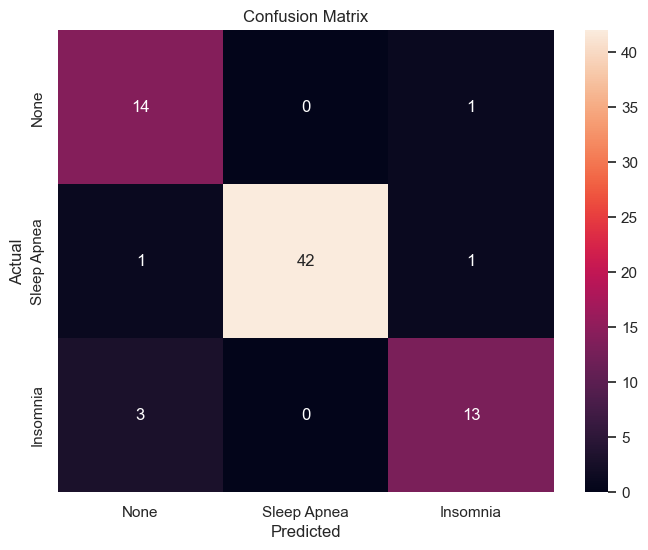

In [39]:
#Confusion Matrix heatmap using the original model
originalModel_confusionMatrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    originalModel_confusionMatrix, 
    index = ['None', 'Sleep Apnea', 'Insomnia'], 
    columns = ['None', 'Sleep Apnea', 'Insomnia']
)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Ayy built my first ML Model